# <center>***数据预处理与特征工程***</center>

数据预处理是机器学习和数据分析中至关重要的一步，旨在清洁、转换和准备原始数据，以便将其应用于后续的建模和分析过程。
<br><br><br>


## **数据收集与获取：**
   这一步涉及收集与获取原始数据，可以从数据库、文件、API、传感器等各种来源获取数据。


### *读取CSV文件*

In [1]:
import pandas as pd

df1 = pd.read_csv("data\\boston_house_prices.csv", 
                header=1, 
                sep=",", 
                encoding="utf-8", # 中文使用gbk
                )
df1.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


### *读取Excel文件*

In [2]:
import pandas as pd

df2 = pd.read_excel("data\\Evaluation.xlsx")
df2.head(2)

,序号,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
0,1,1.5,7.1,280,424,4,430,90,112,459,453
1,2,1.5,7.1,280,424,4,431,92,112,459,453


In [3]:
df3 = pd.read_excel("data\\iris.xlsx")
df3.head(2)

,X1,X2,X3,X4,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


## **数据形式转换**

### ***宽数据框转换为长数据框***

In [4]:
import pandas as pd

# 创建原始 DataFrame
data_wide = pd.DataFrame({
    'A': [10, 40],
    'B': [20, 50],
    'C': [30, 60]
})
data_wide

,A,B,C
0,10,20,30
1,40,50,60


In [5]:
# 使用 pd.melt 函数将多列堆叠成两列
data_long = pd.melt(data_wide, var_name='Category', value_name='Value')

# 查看转换后的 DataFrame
data_long

,Category,Value
0,A,10
1,A,40
2,B,20
3,B,50
4,C,30
5,C,60


### ***长数据框转换为宽数据框***

In [6]:
data_wide = data_long.pivot(columns='Category', values='Value')
data_wide

Category,A,B,C
0,10.0,NaN,NaN
1,40.0,NaN,NaN
2,NaN,20.0,NaN
3,NaN,50.0,NaN
4,NaN,NaN,30.0
5,NaN,NaN,60.0


## **数据集成**

### ***最简单的一种，直接纵向拼接***

In [7]:
import pandas as pd

# 创建两个简单的 DataFrame
__df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})
__df1.head()

,ID,Name,Age
0,1,Alice,25
1,2,Bob,30
2,3,Charlie,35


In [8]:
__df2 = pd.DataFrame({
    'ID': [1, 2],
    'Name': ['David', 'Eve'],
    'Age': [40, 45]
})
__df2.head()

,ID,Name,Age
0,1,David,40
1,2,Eve,45


In [9]:
# 沿着行方向合并（默认为 0 轴）
__df_concat = pd.concat([__df1, __df2], ignore_index=True)

# 显示合并后的 DataFrame
__df_concat

,ID,Name,Age
0,1,Alice,25
1,2,Bob,30
2,3,Charlie,35
3,1,David,40
4,2,Eve,45


### ***按某一分类特征进行集成***

>https://blog.csdn.net/brucewong0516/article/details/82707492

In [10]:
# 创建两个 DataFrame
__df3 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})
__df3

,ID,Name,Age
0,1,Alice,25
1,2,Bob,30
2,3,Charlie,35


In [11]:
__df4 = pd.DataFrame({
    'ID': [4, 1, 2],
    'City': ['New York', 'Los Angeles', 'Chicago'],
    'Country': ['USA', 'USA', 'USA']
})
__df4

,ID,City,Country
0,4,New York,USA
1,1,Los Angeles,USA
2,2,Chicago,USA


In [12]:
# 使用 merge 方法连接 DataFrame
__df_merge = pd.merge(
                    __df3, __df4, # 需要连接的dataframe
                    on='ID', # 连接的参考列
                    how='right', # 连接的取向：left, right, inner
                    )

# 显示连接后的 DataFrame
__df_merge

,ID,Name,Age,City,Country
0,4,NaN,NaN,New York,USA
1,1,Alice,25.0,Los Angeles,USA
2,2,Bob,30.0,Chicago,USA


In [13]:
# 使用 merge 方法连接 DataFrame
__df_merge = pd.merge(
                    __df3, __df4, # 需要连接的dataframe
                    on='ID', # 连接的参考列
                    how='left', # 连接的取向：
                    )

# 显示连接后的 DataFrame
__df_merge

,ID,Name,Age,City,Country
0,1,Alice,25,Los Angeles,USA
1,2,Bob,30,Chicago,USA
2,3,Charlie,35,NaN,NaN


In [14]:
# 使用 merge 方法连接 DataFrame
__df_merge = pd.merge(
                    __df3, __df4, # 需要连接的dataframe
                    on='ID', # 连接的参考列
                    how='inner', # 连接的取向：left, right, inner
                    )

# 显示连接后的 DataFrame
__df_merge

,ID,Name,Age,City,Country
0,1,Alice,25,Los Angeles,USA
1,2,Bob,30,Chicago,USA


## **数据拆分**

In [15]:
df3["class"]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

In [16]:
import pandas as pd

# 假设df是你的数据集DataFrame，category_column是分类列的名称
# 首先，找出所有不同的类别
categories = df3["class"].unique()

# 然后，为每个类别创建一个空的DataFrame
category_datasets = {category: pd.DataFrame() for category in categories}

# 遍历原始数据集，并将每个记录分配到相应的类别DataFrame中
for category in categories:
    category_datasets[category] = df3[df3["class"] == category]

In [17]:
# 现在，category_datasets字典中包含了按类别划分的数据集
# 你可以使用category_datasets[category_name]来访问特定类别的数据集
setosa = category_datasets["setosa"]
versicolor = category_datasets["versicolor"]
virginica = category_datasets["virginica"]


## **数据清洗：**
   数据可能包含缺失值、异常值、错误值等问题。在数据清洗阶段，你需要处理这些问题，以确保数据质量。常见的操作包括填充缺失值、删除异常值或错误值、纠正数据格式等。


### *剔除重复值*

In [18]:
df1 = df1.drop_duplicates()

### *缺失值的检测与处理*

In [19]:
# 缺失值分布情况统计
nan_ = df1.isnull().sum()
print(df1.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [20]:
# 直接删掉含有缺失值的行：在数据集不太大、缺失值非常多的时候不要用
# df1 = df1.dropna()

# 使用指定数值填补缺失值（比如3，也可以是字符串）
# df1['Gender'].fillna(3, inplace=True)

# 分类、序数特征用的是众数填补缺失值，mode()后面的[0]是为了避免数据中不止一个众数
# df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)

# 数值特征用均值填补缺失值
# df1['LoanAmount'].fillna(df1['LoanAmount'].mean(), inplace=True)



# -----------------------------------------------------------------------------



# 数值特征用中位数填补缺失值
# df1['LoanAmount'].fillna(df1['LoanAmount'].median(), inplace=True)

# 用插值方法填补缺失值，注意如果数据开头就是缺失值，那么那个缺失值不会被插补
# df1['LoanAmount'] = df1['LoanAmount'].interpolate(method="linear", axis=0)

# 删除数据集df1中ApplicantIncome的值为'value'的样本
# df1 = df1[df1['ApplicantIncome'] != 'value']

# 用前一个值填补
# df1['column'].fillna(method='ffill', inplace=True)
# 用后一个值填补
# df1['column'].fillna(method='bfill', inplace=True)

### *离群值的检测与处理*

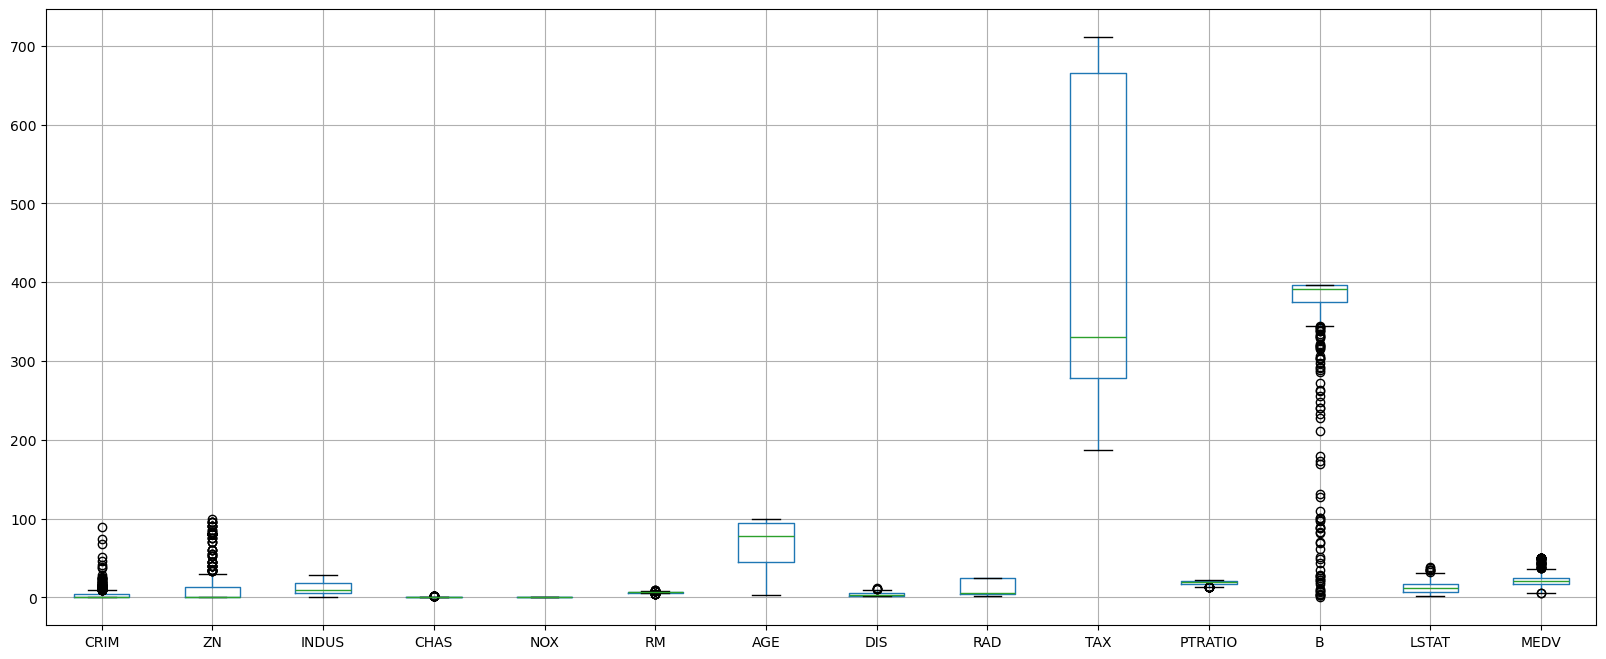

In [21]:
import matplotlib.pyplot as plt

df1.boxplot(figsize=(20, 8))
plt.show()

In [22]:
from sklearn.ensemble import IsolationForest

# 创建孤立森林作为异常检测模型，contamination值要酌情根据箱线图给出
model = IsolationForest(contamination=0.05)
df1['is_outlier'] = model.fit_predict(df1[['B']])
df_cleaned = df1[df1['is_outlier'] != -1]


## **特征转换：**
   在这一步，数据可能需要进行转换以适应后续的分析或建模。这可能包括将数据编码为适当的格式（例如数值编码或独热编码）、进行特征缩放（例如归一化或标准化）等。


### *数据编码*

In [23]:
df33 = pd.read_excel("data\\dowjones.xlsx")

# 日期编码
df33["date"] = pd.to_datetime(df33["Date"])
df33.head()

,Date,Price,date
0,1914-12-01,55.00,1914-12-01
1,1915-01-01,56.55,1915-01-01
2,1915-02-01,56.00,1915-02-01
3,1915-03-01,58.30,1915-03-01
4,1915-04-01,66.45,1915-04-01


In [24]:
# 独热编码（函数会自动识别分类特征，将字符串全部独热编码）
df1 = pd.get_dummies(df1)

In [25]:
# 标签编码（详细显示编码对应关系）
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df3['class'] = label.fit_transform(df3['class'])

label.classes_  # 查看标签编码对应关系

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [26]:
# 数值特征离散化
bins = [0, 10, 20, 30, 40, 50]
labels = ['第一组', '第二组', '第三组', '第四组', '第五组']
df1['binned_column'] = pd.cut(df1['MEDV'], bins=bins, labels=labels)
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,is_outlier,binned_column
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,第三组
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1,第三组
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,第四组
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,第四组
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,第四组
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1,第三组
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,1,第三组
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,1,第三组
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,1,第三组


### *特征缩放：注意会把dataframe变成array*

In [27]:
# 假设你的数据集为df，包含特征和目标变量
X = df1.drop(columns=['MEDV', 'binned_column']) 
y = df1['MEDV']

In [28]:
from sklearn.preprocessing import StandardScaler

# 标准化 (Z-Score 归一化)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns
X_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,is_outlier
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.232737
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,0.232737
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,0.232737
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,0.232737
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,0.232737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,0.232737
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,0.232737
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.232737
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,0.232737


In [29]:
from sklearn.preprocessing import MinMaxScaler

# MinMax 缩放
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns
X_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,is_outlier
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,1.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,1.0
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,1.0
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,1.0
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,1.0
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,1.0
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,1.0
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,1.0



## **数据集划分：**
   将数据集划分为训练集、验证集和测试集是为了评估模型性能的步骤。通常，训练集用于训练模型，验证集用于调整模型参数，测试集用于评估模型的泛化性能。


In [30]:
from sklearn.model_selection import train_test_split

# 划分数据集为训练集、验证集和测试集
# test_size表示测试集的比例，random_state用于确保可复现的随机划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **特征选择与降维：**
   如果数据集包含大量特征，你可能需要进行特征选择或降维，以减少计算成本并降低过拟合风险。常见的降维方法包括主成分分析（PCA）等。


### *特征选择*

In [31]:
# VarianceThreshold: 根据特征的方差进行选择。可以用于删除方差较低的特征，因为这些特征可能包含的信息较少。
from sklearn.feature_selection import VarianceThreshold

# 创建VarianceThreshold实例：改变threshold的值
selector = VarianceThreshold(threshold=111.5)

# 对数据进行特征选择
X_selected = selector.fit_transform(df1.drop("binned_column", axis=1))

print("原始特征数量:", X.shape[1])
print("选择后的特征数量:", X_selected.shape[1])

原始特征数量: 14
选择后的特征数量: 4


In [32]:
# SelectKBest和SelectPercentile: 基于统计测试的方法，选择与目标变量最相关的前K个特征，或者选择在指定百分比范围内与目标变量最相关的特征。
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2

# 创建SelectKBest实例
# k_best_selector = SelectKBest(score_func=chi2, k=2)  # 这个k就是你要保留的特征
# X_k_best = k_best_selector.fit_transform(X, y)

# 创建SelectPercentile实例
# percentile_selector = SelectPercentile(score_func=chi2, percentile=50)  # percentile=50 表示你要选择与目标变量最相关的 50% 的特征。
# X_percentile = percentile_selector.fit_transform(X, y)

# print("SelectKBest选中的特征:\n", X_k_best)
# print("SelectPercentile选中的特征:\n", X_percentile)

### *基于主成分分析法的数据降维*

In [33]:
# 中文字体宋体，英文字体新罗马
plt.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

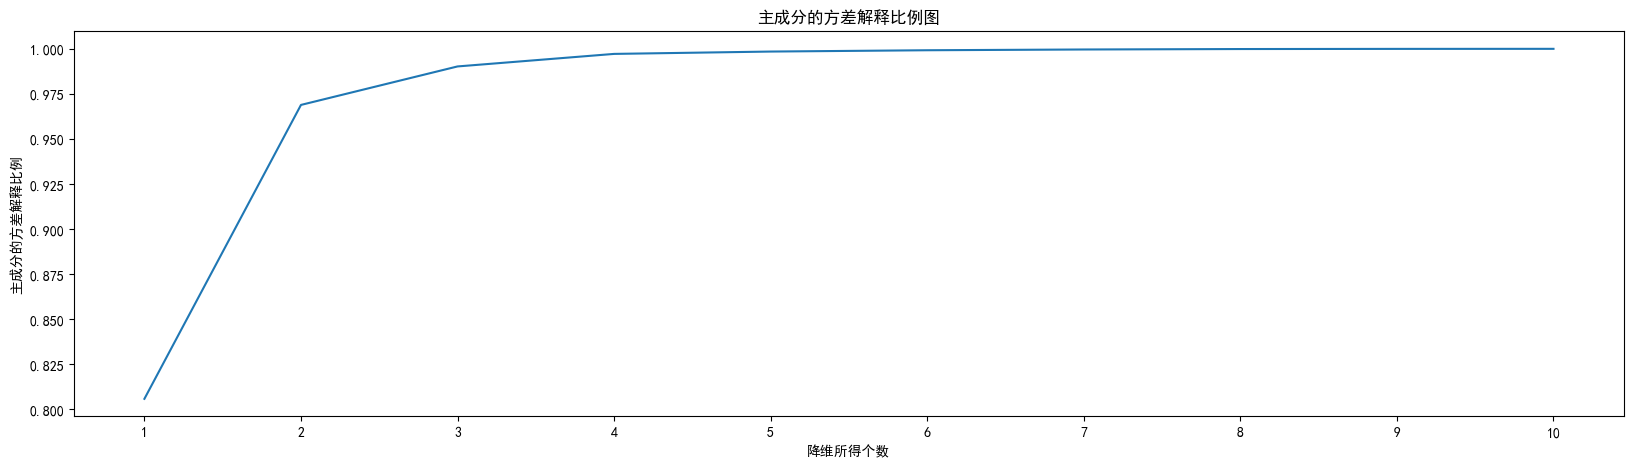

In [34]:
# 绘制主成分方差解释比例图
"""
在主成分方差解释比例图中，x轴表示主成分的个数，y轴表示累积主成分方差解释比例。
通过观察图表，你可以找到一个“肘部”点，这个点通常是一个拐点，之后的主成分所解释的方差比例增长会减缓。
这个肘部点所对应的主成分数量可以作为一个合理的n_components选择。
"""

from sklearn.decomposition import PCA
import numpy as np

# 创建PCA实例：n_components表示降维后的特征数量
pca = PCA(n_components=10)

# 拟合PCA模型并进行降维
X = pca.fit_transform(X)

plt.figure(figsize=(20, 5))
plt.plot(range(1, 11), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1, 11))
plt.xlabel('降维所得个数')
plt.ylabel('主成分的方差解释比例')
plt.title('主成分的方差解释比例图')
plt.show()


In [35]:
# 创建PCA实例：n_components表示降维后的特征数量
pca = PCA(n_components=3)

# 拟合PCA模型并进行降维
X = pca.fit_transform(X)


## **标签平衡：**
   在某些情况下，数据集可能存在类别不平衡的问题，即某些类别的样本数量远远少于其他类别。在这种情况下，你可能需要采取措施来平衡样本，以避免模型偏向数量较多的类别。


In [36]:
from imblearn.over_sampling import RandomOverSampler

# 创建RandomOverSampler对象
# ros = RandomOverSampler(random_state=0)

# 对数据进行上采样
# X_upsampled, y_upsampled = ros.fit_resample(X, y)